In [0]:
dbutils.fs.ls("/FileStore/tables")

Out[1]: [FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019/', name='clinicaltrial_2019/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019.csv', name='clinicaltrial_2019.csv', size=42400056, modificationTime=1650102313000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019_csv.gz', name='clinicaltrial_2019_csv.gz', size=10060669, modificationTime=1649091155000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020/', name='clinicaltrial_2020/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020_csv.gz', name='clinicaltrial_2020_csv.gz', size=10981608, modificationTime=1649091285000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2021/', name='clinicaltrial_2021/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2021.csv', name='clinicaltrial_2021.csv', size=50359696, modificationTime=1652346915000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2

In [0]:
fileroot= "clinicaltrial_2021_csv"
fileroot2="clinicaltrial_2021.csv"
dbutils.fs.cp("/FileStore/tables/" + fileroot + ".gz","file:/tmp/")
import os
os.environ["fileroot"] = fileroot
os.environ["fileroot2"] = fileroot2

In [0]:
%sh
gzip  -d /tmp/$fileroot.gz
mv /tmp/$fileroot /tmp/$fileroot2
ls /tmp

Rserv
Rtmp8asMoZ
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2021.csv
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
ipykernel-connection-ReplId-13c06-3eacb-53df4-4.json
ipykernel-connection-ReplId-5296f-a2fa3-3357e-b.json
systemd-private-652a58decda84c93b7891feb4f7fd15f-apache2.service-KpcqYg
systemd-private-652a58decda84c93b7891feb4f7fd15f-ntp.service-NU8hKf
systemd-private-652a58decda84c93b7891feb4f7fd15f-systemd-logind.service-llRiyg
systemd-private-652a58decda84c93b7891feb4f7fd15f-systemd-resolved.service-HXe2Mh
tmp.jZmaWbUmeu


In [0]:
dbutils.fs.cp('file:/tmp/'+fileroot2, '/FileStore/tables/'+ fileroot2)

Out[4]: True

In [0]:
dbutils.fs.head('/FileStore/tables/'+fileroot2)

[Truncated to first 65536 bytes]
Out[5]: "Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions\r\nNCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||\r\nNCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|\r\nNCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|\r\nNCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|\r\nNCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|\r\nNCT02757209|Consorzio Futuro in Ricerca|Completed|Apr 2016|Jan 2018|Interventional|Apr 2016|Asthma|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate\r\nNCT02752438|Ankara University|Unkn

In [0]:
for line in dbutils.fs.head('/FileStore/tables/'+fileroot2).splitlines():
    print(line)

[Truncated to first 65536 bytes]
Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions
NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||
NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|
NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|
NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|
NCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|
NCT02757209|Consorzio Futuro in Ricerca|Completed|Apr 2016|Jan 2018|Interventional|Apr 2016|Asthma|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate
NCT02752438|Ankara University|Unknown status|May 2016|Jul 2017|O

In [0]:
clinicaltrial_2021= spark.read.options(delimiter='|').option( 'header',True).csv('/FileStore/tables/'+fileroot2)

In [0]:
clinicaltrial_2021.printSchema()

root
 |-- Id: string (nullable = true)
 |-- Sponsor: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- Start: string (nullable = true)
 |-- Completion: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Submission: string (nullable = true)
 |-- Conditions: string (nullable = true)
 |-- Interventions: string (nullable = true)



In [0]:
clinicaltrial_2021.show()

+-----------+--------------------+--------------------+--------+----------+--------------------+----------+--------------------+--------------------+
|         Id|             Sponsor|              Status|   Start|Completion|                Type|Submission|          Conditions|       Interventions|
+-----------+--------------------+--------------------+--------+----------+--------------------+----------+--------------------+--------------------+
|NCT02758028|The University of...|          Recruiting|Aug 2005|  Nov 2021|      Interventional|  Apr 2016|                null|                null|
|NCT02751957|     Duke University|           Completed|Jul 2016|  Jul 2020|      Interventional|  Apr 2016|Autistic Disorder...|                null|
|NCT02758483|Universidade Fede...|           Completed|Mar 2017|  Jan 2018|      Interventional|  Apr 2016|   Diabetes Mellitus|                null|
|NCT02759848|Istanbul Medeniye...|           Completed|Jan 2012|  Dec 2014|       Observational|  Ma

In [0]:
dbutils.fs.head('/FileStore/tables/mesh.csv')

[Truncated to first 65536 bytes]
Out[10]: 'term,tree\r\nCalcimycin,D03.633.100.221.173\r\nA-23187,D03.633.100.221.173\r\nTemefos,D02.705.400.625.800\r\nTemefos,D02.705.539.345.800\r\nTemefos,D02.886.300.692.800\r\nAbate,D02.705.400.625.800\r\nAbate,D02.705.539.345.800\r\nAbate,D02.886.300.692.800\r\nDifos,D02.705.400.625.800\r\nDifos,D02.705.539.345.800\r\nDifos,D02.886.300.692.800\r\nAbattoirs,J01.576.423.200.700.100\r\nAbattoirs,J03.540.020\r\nAbbreviations as Topic,L01.559.598.400.556.131\r\nAcronyms as Topic,L01.559.598.400.556.131\r\nAbdomen,A01.923.047\r\n"Abdomen, Acute",C23.888.592.612.054.200\r\n"Abdomen, Acute",C23.888.821.030.249\r\nAbdominal Injuries,C26.017\r\nAbdominal Neoplasms,C04.588.033\r\nAbdominal Muscles,A02.633.567.050\r\nCremaster Muscle,A02.633.567.050\r\nPyramidalis Muscle,A02.633.567.050\r\nQuadratus Abdominis,A02.633.567.050\r\nTransversus Abdominis,A02.633.567.050\r\nAbducens Nerve,A08.800.800.120.030\r\nAbelson murine leukemia virus,B04.613.807.375.525.020\

In [0]:
for line in dbutils.fs.head('/FileStore/tables/mesh.csv').splitlines():
    print(line)

[Truncated to first 65536 bytes]
term,tree
Calcimycin,D03.633.100.221.173
A-23187,D03.633.100.221.173
Temefos,D02.705.400.625.800
Temefos,D02.705.539.345.800
Temefos,D02.886.300.692.800
Abate,D02.705.400.625.800
Abate,D02.705.539.345.800
Abate,D02.886.300.692.800
Difos,D02.705.400.625.800
Difos,D02.705.539.345.800
Difos,D02.886.300.692.800
Abattoirs,J01.576.423.200.700.100
Abattoirs,J03.540.020
Abbreviations as Topic,L01.559.598.400.556.131
Acronyms as Topic,L01.559.598.400.556.131
Abdomen,A01.923.047
"Abdomen, Acute",C23.888.592.612.054.200
"Abdomen, Acute",C23.888.821.030.249
Abdominal Injuries,C26.017
Abdominal Neoplasms,C04.588.033
Abdominal Muscles,A02.633.567.050
Cremaster Muscle,A02.633.567.050
Pyramidalis Muscle,A02.633.567.050
Quadratus Abdominis,A02.633.567.050
Transversus Abdominis,A02.633.567.050
Abducens Nerve,A08.800.800.120.030
Abelson murine leukemia virus,B04.613.807.375.525.020
Abelson murine leukemia virus,B04.820.650.375.525.020
Abetalipoproteinemia,C16.320.565.398.

In [0]:
mesh= spark.read.options(delimiter=',').option( 'header',True).csv('/FileStore/tables/mesh.csv')

In [0]:
mesh.printSchema()

root
 |-- term: string (nullable = true)
 |-- tree: string (nullable = true)



In [0]:
mesh.show()

+--------------------+--------------------+
|                term|                tree|
+--------------------+--------------------+
|          Calcimycin| D03.633.100.221.173|
|             A-23187| D03.633.100.221.173|
|             Temefos| D02.705.400.625.800|
|             Temefos| D02.705.539.345.800|
|             Temefos| D02.886.300.692.800|
|               Abate| D02.705.400.625.800|
|               Abate| D02.705.539.345.800|
|               Abate| D02.886.300.692.800|
|               Difos| D02.705.400.625.800|
|               Difos| D02.705.539.345.800|
|               Difos| D02.886.300.692.800|
|           Abattoirs|J01.576.423.200.7...|
|           Abattoirs|         J03.540.020|
|Abbreviations as ...|L01.559.598.400.5...|
|   Acronyms as Topic|L01.559.598.400.5...|
|             Abdomen|         A01.923.047|
|      Abdomen, Acute|C23.888.592.612.0...|
|      Abdomen, Acute| C23.888.821.030.249|
|  Abdominal Injuries|             C26.017|
| Abdominal Neoplasms|         C

In [0]:
dbutils.fs.head('/FileStore/tables/pharma.csv')

[Truncated to first 65536 bytes]
Out[15]: '"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"\n"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to in

In [0]:
for line in dbutils.fs.head('/FileStore/tables/pharma.csv').splitlines():
    print(line)

[Truncated to first 65536 bytes]
"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"
"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctor

In [0]:
pharma= spark.read.options(delimiter=',').option( 'header',True).csv('/FileStore/tables/pharma.csv')

In [0]:
pharma.printSchema()

root
 |-- Company: string (nullable = true)
 |-- Parent_Company: string (nullable = true)
 |-- Penalty_Amount: string (nullable = true)
 |-- Subtraction_From_Penalty: string (nullable = true)
 |-- Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting: string (nullable = true)
 |-- Penalty_Year: string (nullable = true)
 |-- Penalty_Date: string (nullable = true)
 |-- Offense_Group: string (nullable = true)
 |-- Primary_Offense: string (nullable = true)
 |-- Secondary_Offense: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Level_of_Government: string (nullable = true)
 |-- Action_Type: string (nullable = true)
 |-- Agency: string (nullable = true)
 |-- Civil/Criminal: string (nullable = true)
 |-- Prosecution_Agreement: string (nullable = true)
 |-- Court: string (nullable = true)
 |-- Case_ID: string (nullable = true)
 |-- Private_Litigation_Case_Title: string (nullable = true)
 |-- Lawsuit_Resolution: string (nullable = true)
 |-- Facility_State: string (

In [0]:
pharma.show()

+--------------------+--------------------+--------------+------------------------+---------------------------------------------------------+------------+------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------+--------------------+------------------+---------------------+-----+---------------+-----------------------------+------------------+--------------+------------+--------------------+-----+----------+--------------------+--------------------+------------------+-------------------+---------------------------+------------------------+---------------------------+--------------------+--------------------+
|             Company|      Parent_Company|Penalty_Amount|Subtraction_From_Penalty|Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting|Penalty_Year|Penalty_Date|       Offense_Group|     Primary_Offense|   Secondary_Offense|         Description|Level_of_Government|  Action_Type|              Agency|    C

Answer 1

In [0]:
clinicaltrial_2021.count()

Out[20]: 387261

Answer 2

In [0]:
from pyspark.sql.functions import desc
clinicaltrial_2021.groupBy('Type').count().withColumnRenamed('count','Frequency').sort(desc('count')).show(truncate=False)

+--------------------------------+---------+
|Type                            |Frequency|
+--------------------------------+---------+
|Interventional                  |301472   |
|Observational                   |77540    |
|Observational [Patient Registry]|8180     |
|Expanded Access                 |69       |
+--------------------------------+---------+



Question 3 Data Processing

In [0]:
from pyspark.sql.functions import col,split, explode
clinicaltrial_2021DF= clinicaltrial_2021.withColumn('Conditions',explode(split(col('Conditions'),(','))))

Answer 3

In [0]:
clinicaltrial_2021DF.groupBy('Conditions').count().withColumnRenamed('count','Frequency').sort(desc('count')).show(5)

+-----------------+---------+
|       Conditions|Frequency|
+-----------------+---------+
|        Carcinoma|    13389|
|Diabetes Mellitus|    11080|
|        Neoplasms|     9371|
| Breast Neoplasms|     8640|
|         Syndrome|     8032|
+-----------------+---------+
only showing top 5 rows



Question 4 Data Processing

In [0]:
from pyspark.sql.functions import substring
meshDF= mesh.withColumn('tree', substring(mesh.tree,1,3))
meshDF.show(10)

+----------+----+
|      term|tree|
+----------+----+
|Calcimycin| D03|
|   A-23187| D03|
|   Temefos| D02|
|   Temefos| D02|
|   Temefos| D02|
|     Abate| D02|
|     Abate| D02|
|     Abate| D02|
|     Difos| D02|
|     Difos| D02|
+----------+----+
only showing top 10 rows



In [0]:
JoinDF= clinicaltrial_2021DF.join(meshDF, clinicaltrial_2021DF.Conditions==meshDF.term,'inner')
JoinDF.show(2)

+-----------+---------------+---------+--------+----------+--------------+----------+--------------------+-------------+--------------------+----+
|         Id|        Sponsor|   Status|   Start|Completion|          Type|Submission|          Conditions|Interventions|                term|tree|
+-----------+---------------+---------+--------+----------+--------------+----------+--------------------+-------------+--------------------+----+
|NCT02751957|Duke University|Completed|Jul 2016|  Jul 2020|Interventional|  Apr 2016|   Autistic Disorder|         null|   Autistic Disorder| F03|
|NCT02751957|Duke University|Completed|Jul 2016|  Jul 2020|Interventional|  Apr 2016|Autism Spectrum D...|         null|Autism Spectrum D...| F03|
+-----------+---------------+---------+--------+----------+--------------+----------+--------------------+-------------+--------------------+----+
only showing top 2 rows



Answer 4

In [0]:
JoinDF.groupBy('tree').count().withColumnRenamed('count','Frequency').sort(desc('count')).show(5)

+----+---------+
|tree|Frequency|
+----+---------+
| C04|   143994|
| C23|   136079|
| C01|   106674|
| C14|    94523|
| C10|    92310|
+----+---------+
only showing top 5 rows



Question 5 Data Processing

In [0]:
pharmaclinical= clinicaltrial_2021.join(pharma.withColumnRenamed('Parent_Company', 'Sponsor'),'Sponsor','left_anti')

In [0]:
pharmaclinical.show(2)

+--------------------+-----------+----------+--------+----------+--------------+----------+--------------------+-------------+
|             Sponsor|         Id|    Status|   Start|Completion|          Type|Submission|          Conditions|Interventions|
+--------------------+-----------+----------+--------+----------+--------------+----------+--------------------+-------------+
|The University of...|NCT02758028|Recruiting|Aug 2005|  Nov 2021|Interventional|  Apr 2016|                null|         null|
|     Duke University|NCT02751957| Completed|Jul 2016|  Jul 2020|Interventional|  Apr 2016|Autistic Disorder...|         null|
+--------------------+-----------+----------+--------+----------+--------------+----------+--------------------+-------------+
only showing top 2 rows



Answer 5

In [0]:
from pyspark.sql.functions import concat,lit
pharmaclinicalDF=pharmaclinical.groupBy('Sponsor').count().select(concat(col('Sponsor'), lit(':'), col('count'))).sort(desc('count')).show(10,False)

+--------------------------------------------+
|concat(Sponsor, :, count)                   |
+--------------------------------------------+
|National Cancer Institute (NCI):3218        |
|M.D. Anderson Cancer Center:2414            |
|Assistance Publique - Hôpitaux de Paris:2369|
|Mayo Clinic:2300                            |
|Merck Sharp & Dohme Corp.:2243              |
|Assiut University:2154                      |
|Novartis Pharmaceuticals:2088               |
|Massachusetts General Hospital:1971         |
|Cairo University:1928                       |
|Hoffmann-La Roche:1828                      |
+--------------------------------------------+
only showing top 10 rows



Question 6 Data processing

In [0]:
Comp_stud_DF =clinicaltrial_2021.filter(clinicaltrial_2021.Completion.endswith("2021")).filter(clinicaltrial_2021.Status=='Completed').groupBy('Completion').count().sort(desc('count'))

In [0]:
Comp_stud_DF2=Comp_stud_DF.orderBy('Completion').withColumn('Completion', split(col('Completion'),' ').getItem(0))

Answer 6

In [0]:
from pyspark.sql.functions import unix_timestamp
Completed_Studies_by_month= Comp_stud_DF2.sort(unix_timestamp(col("Completion"),"MMM"))
Completed_Studies_by_month.show()

+----------+-----+
|Completion|count|
+----------+-----+
|       Jan| 1131|
|       Feb|  934|
|       Mar| 1227|
|       Apr|  967|
|       May|  984|
|       Jun| 1094|
|       Jul|  819|
|       Aug|  700|
|       Sep|  528|
|       Oct|  187|
+----------+-----+



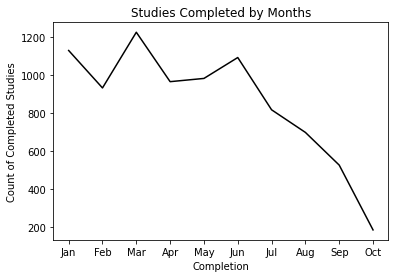

In [0]:
import matplotlib.pyplot as p
#get data
x=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct"]
y=[1131,934,1227,967,984,1094,819,700,528,187]
#plot the data
p.plot(x,y,color='black')
#Include titles
p.title("Studies Completed by Months")
#show labels
p.xlabel("Completion")
p.ylabel("Count of Completed Studies")
p.show()

Additional Analysis

Find out the top 10 sponsors and the number of trials sponsored

In [0]:
MostSponsor= clinicaltrial_2021.select('Sponsor')

In [0]:
MostSponsorDF=MostSponsor.groupBy('Sponsor').count().select(concat(col('Sponsor'), lit(':'), col('count'))).sort(desc('count')).show(10,False)

+--------------------------------------------+
|concat(Sponsor, :, count)                   |
+--------------------------------------------+
|GlaxoSmithKline:3378                        |
|National Cancer Institute (NCI):3218        |
|AstraZeneca:2691                            |
|Pfizer:2645                                 |
|M.D. Anderson Cancer Center:2414            |
|Assistance Publique - Hôpitaux de Paris:2369|
|Mayo Clinic:2300                            |
|Merck Sharp & Dohme Corp.:2243              |
|Assiut University:2154                      |
|Novartis Pharmaceuticals:2088               |
+--------------------------------------------+
only showing top 10 rows



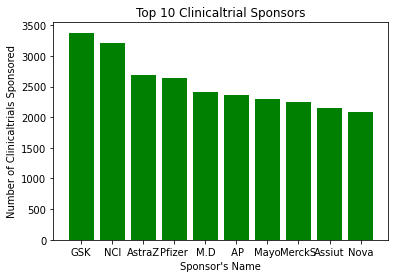

In [0]:
#get data
x=["GSK","NCI","AstraZ","Pfizer","M.D"," AP","Mayo","MerckS","Assiut","Nova"]
y=[3378,3218,2691,2645, 2414, 2369, 2300, 2243, 2154, 2088]
#plot the data
p.bar(x,y, color='Green')
#Include titles
p.title("Top 10 Clinicaltrial Sponsors")
#show labels
p.xlabel("Sponsor's Name")
p.ylabel("Number of Clinicaltrials Sponsored")
p.show()

Top 5 most frequently fined Pharmaceuticals

In [0]:
pharma.groupBy('Parent_Company').count().withColumnRenamed('count','Frequency').sort(desc('count')).show(5,truncate=False)

+------------------------------+---------+
|Parent_Company                |Frequency|
+------------------------------+---------+
|Merck                         |78       |
|Pfizer                        |71       |
|Johnson & Johnson             |59       |
|Teva Pharmaceutical Industries|53       |
|AbbVie                        |49       |
+------------------------------+---------+
only showing top 5 rows



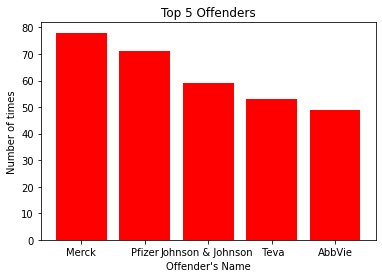

In [0]:
#get data
x=["Merck","Pfizer","Johnson & Johnson ", " Teva","AbbVie"]
y=[78, 71, 59, 53, 49]
#plot the data
p.bar(x,y, color='Red')
#Include titles
p.title("Top 5 Offenders")
#show labels
p.xlabel("Offender's Name")
p.ylabel("Number of times")
p.show()

Find out the types of offenses committed by pharmaceutical companies and frequency of committing the offences

In [0]:
pharma.groupBy('Offense_Group').count().withColumnRenamed('count','Frequency').sort(desc('count')).show(truncate=False)

+---------------------------------------+---------+
|Offense_Group                          |Frequency|
+---------------------------------------+---------+
|government-contracting-related offenses|281      |
|environment-related offenses           |202      |
|healthcare-related offenses            |128      |
|safety-related offenses                |128      |
|competition-related offenses           |103      |
|employment-related offenses            |72       |
|consumer-protection-related offenses   |29       |
|financial offenses                     |24       |
|miscellaneous offenses                 |1        |
+---------------------------------------+---------+



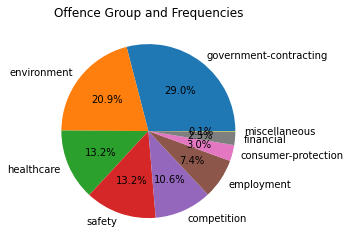

In [0]:
import numpy as np
#get data
Labels=["government-contracting","environment","healthcare","safety","competition","employment","consumer-protection","financial","miscellaneous"]
y=np.array([281,202,128,128,103,72,29,24,1])
#plot the data
p.pie(y, labels=Labels,autopct= '%1.1f%%')
#Include titles
p.title("Offence Group and Frequencies")
p.show()